In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 6/07-2023 Employee Attrition'

In [4]:
# employee attrition dataframe creation
df_ea = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.6.3.csv'), index_col = False)

In [5]:
# Drop Unnamed column
df_ea = df_ea.drop(columns = ['Unnamed: 0'])

In [6]:
df_ea.columns

Index(['EmployeeID', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_full',
       'termreason_desc', 'termtype_desc', 'status_year', 'status',
       'business_unit', 'age_today', 'generation', 'manager?'],
      dtype='object')

In [7]:
# Select only numerical variables and put them in a list called columns

columns = ['age', 'length_of_service']

In [8]:
# Create subset

df_ea_num = df_ea[columns]

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_ea_num).score(df_ea_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-9654631.193402208,
 -2593717.3116291636,
 -1329258.6938864824,
 -882160.1639764286,
 -672535.1756744166,
 -480500.64768721745,
 -367677.8060268755,
 -296103.97102719574,
 -250333.0498482838]

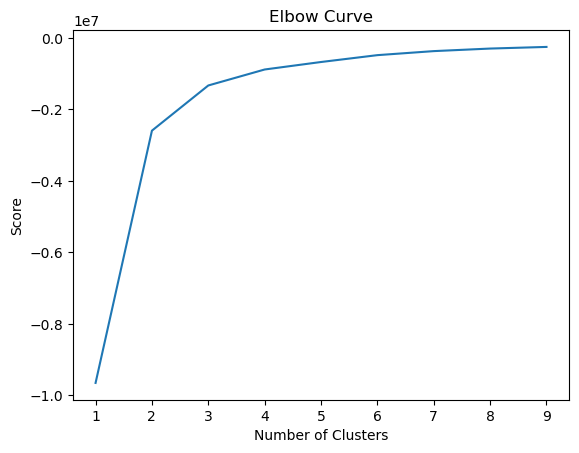

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_ea_num)

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
df_ea['clusters'] = kmeans.fit_predict(df_ea_num)

/Users/nicolechiu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df_ea.head()

,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation,manager?,clusters
0,1318,1/3/54,8/28/89,1/1/00,52,17,Idaho,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers,Yes,2
1,1318,1/3/54,8/28/89,1/1/00,53,18,Idaho,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers,Yes,2
2,1318,1/3/54,8/28/89,1/1/00,54,19,Idaho,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers,Yes,2
3,1318,1/3/54,8/28/89,1/1/00,55,20,Idaho,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers,Yes,2
4,1318,1/3/54,8/28/89,1/1/00,56,21,Idaho,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers,Yes,2


In [16]:
df_ea['clusters'].value_counts()

1    16842
2    16763
0    16048
Name: clusters, dtype: int64

In [17]:
df_ea.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.6.7.csv'))